# Maximum Likelihood Estimator (part2)

# Outline

1. More examples

2. Properties of MLE

3. Errors on MLE

4. MCMC

# More examples

# Pareto distribution

The Pareto distribution has quite a large usage in economics. It has the form

\begin{eqnarray}
f(x; x_0\theta)=\theta x_0^{\theta}x^{-\theta-1}
\end{eqnarray}

$x\ge x_0$ and $\theta>1$. We also assume $x_0>0$.

Assuming a given data set $\{ x_n\}$ find an estimator for $\theta$




We calculate the MLE

\begin{eqnarray}
\ln L &=& \sum_i \ln \left(\theta x_0^{\theta}x_i^{-\theta-1} \right)\\
&=&\sum_i \ln \theta+\theta\ln x_0-(\theta+1)\ln x_i\\
&=&N \ln \theta+N\theta \ln x_0 -(\theta+1)\sum_i \ln x_i
\end{eqnarray}


We calculate the derivative respect to $\theta$ as



\begin{eqnarray}
\frac{d \ln L}{d \theta}=0=N\frac{1}{\theta}-\sum_i \ln x_i +N\ln x_0
\end{eqnarray}

so

\begin{eqnarray}
\theta=\frac{N}{\sum_i \ln x_i -N\ln x_0}
\end{eqnarray}


# Exponential distribution

Assume $\{x_n\}$ is a series of independent random variables with PDF

\begin{eqnarray}
f(x|\sigma)=\frac{1}{2\sigma}e^{-|x|/\sigma}
\end{eqnarray}

Find an estimator for $\sigma$.


We calculate the $\ln L$


\begin{eqnarray}
\ln L&=&\sum_i -\ln 2 -\ln \sigma -\frac{|x_i|}{\sigma}
\end{eqnarray}


the derivative is

\begin{eqnarray}
\frac{d \ln L}{d \sigma}&=&0=\sum_i -\frac{1}{\sigma}+\frac{|x_i|}{\sigma^2}\\
&=& -\frac{N}{\sigma}+\frac{\sum_i|x_i|}{\sigma^2}
\end{eqnarray}

so

\begin{eqnarray}
\sigma=\frac{\sum_i |x_i|}{N}
\end{eqnarray}


# Properties of the ML estimator

#### So how good are ML estimators?

#### 1. Consistency: Usually, ML estimators are consistent. That is for increasing data sets, the estimator approaches the true value of the parameter.

#### 2. Efficiency





#### No such thing as a generally efficent estimator. Efficiency depends on the case considered. 
### Limit of Accuracy: Minimum Variance Bound (MVB)
\begin{equation}
V(\hat{a})\ge\frac{-1}{d^2 \log{L}/da^2}
\end{equation}
#### For efficient estimators $V(\hat{a})=MVB$

#### For a Gaussian distribution:
\begin{equation}
L=-\sum\frac{(x_i-\mu)^2}{2\sigma^2}-N\ln{\sigma\sqrt{2\pi}}
\end{equation}
#### What is the MVB?

#### 3. Biaseness: However, the ML estimator is often biased. This can be seen by calculating the likelihood function for a data set $\{x_i\}$ with a common mean $\mu$ and uncertainty $\sigma$:

\begin{equation}
P(x_i;\mu,\sigma_i) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
\end{equation}

and find the maximum, where the partial derivatives are zero:


\begin{equation}
\frac{\partial\,\ln L}{\partial\,\mu} = 0\ \frac{\partial\,\ln L}{\partial\,\sigma} = 0
\end{equation}

The ML estimator for the spread of a gaussian data set is $\hat\sigma^2 = \frac{1}{N}\sum_i(x_i-\hat{\mu})^2$ which as we know is biased (does not include Bessel's correction).


# Errors on ML estimators

The error on a ML estimator can be found as discussed in relation to the efficiency:

\begin{eqnarray*}
\widehat{\sigma}_{\hat{a}}^2 = V(\hat{a}) = \mathrm{MVB} =  \frac{-1}{\left\langle \left(\frac{\mathrm{d}^2\,\ln L}{\mathrm{d}a^2}\right) \right\rangle}
\end{eqnarray*}

for unbiased, efficient, ML estimators. 

<img src="Barlow-5-2-ML-sigma.jpg" style="width:650px;height:650px; transform: rotate(0deg)" />

For several variables ($N$), the vector of estimated parameters $\widehat{\vec{a}}$ is found by minimising the $N$-dimensional function  $-\ln\,L$. The inverse of the covariance matrix is then given by:

    
$\mathrm{cov}^{-1}(a_i,a_j) = -\left.\frac{\partial^2\,\ln\,L}{\partial\,a_i\partial\,a_j}\right|_{\vec{a}=\widehat{\vec{a}}}$

Inverse of the Hessian matrix (https://en.wikipedia.org/wiki/Hessian_matrix)



#### MLE provides us with efficient and unbiased estimation when N is large. There is no loss of information through binning as all experimental information is used. It provides errors on its estimates. At small N, however, estimators CAN be biased. You need to make assumptions about the parent PDF and there is no way of estimating a "Goodness of fit"

## Bayesian Inference and MCMC

#### Bayesian inference is a method in which we use Bayes’ Theorem to update our understanding of a probability or a parameter as we gather more data and evidence.

#### Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution.

#### We consider an example of coin flip factory, where we are tasked to estimate the bias of coins produced.
##### In this example, coins have their own bias, but given they are produced identically they only vary from the "factory" bias slightly. Our goal is  to use both information from the specific coin and the factory bias to create a probability distribution to determine the bias a coin is most likely produced with. 

#### The factory has produced the first coin and we perform an experiment flipping the coin 100 times and measuring the amount of heads, in this case 37. We will repeat this experiment once more coins are produce but for now we can analyse this data.

#### Bayes theorem states:
\begin{equation}
P(H|E)=\frac{P(E|H)P(H)}{P(E)},
\end{equation}
#### with P(E|H) is the likelihood of our data given our hypothesis, P(H) the prior, which is the probability of our hypothesis, and P(E) is the evidence or the marginal likelihood. 
### In most practical applications, computing the posterior distribution directly is not possible, this is why we employ numerical sampling techniques like MCMC.

#### Lets look at each part separately: P(H) is the prior and since this is a brand new factory, we can take the probability of a coin having a bias $p$ to be a uniform distribution from 0 to 1, with 0 returning only tails and 1 returning only heads. This is called an uniformed prior (uniform prior).

#### Likelihood:  The probability of observing a heads, x, given a coin with bias p (unknown value). For a coin toss, this function can be described precisely by the Binomial Distribution. The value of $p$ is the value the MCMC will sample

#### Posterior: The probability of the coin having a bias p, given the data at hand.

In [1]:
import scipy.stats as stats
# Define the data
x = 37
n = 100

# Define the Likelihood P(x|p) - binomial distribution
def likelihood(p):
    return stats.binom.pmf(x, n, p)

In [2]:
# Define Prior Function - Uniform Distribution
def prior(p):
    return stats.uniform.pdf(p)

####  The Metropolis-Hastings MCMC
#### As mentioned above, these methods draw samples from a continuous random variable — in our case for $p$. The MCMC we will use is of the random walk type, which randomly generates samples and keeps them or not based on how they fit the model.

### Acceptance Ratio
#### The Metropolis-Hastings algorithm is fairly straightforward, but first, we need to define how we will either accept or reject the new sample draw. Each iteration, a new value for p between 0 and 1 will be proposed, we will call this proposed value p′. We only want to accept and update this value if it is better than the previous. This is done by computing an acceptance ratio, R. This acceptance ratio is the ratio of our Bayes’ Theorem for the proposed value over the previous value:
\begin{equation}
R=min\{1,\frac{P(x|p')P(p')}{P(x|p)P(p)}\}
\end{equation}
#### Acceptance ratio does not include the marginal likelihood (evidence) part of Bayes’ Theorem, nor did we define a function for it above. This is because the evidence does not change for a new value of p, and thus cancels itself out in this ratio. This is awesome, as computing the marginal likelihood part of Bayes’ Theorem is usually extremely difficult or impossible in practice. 

#### Any value greater than 1 for the acceptance ration here means that the proposed value is better and should be accepted. The second part of accepting new values is comparing R to another random draw between 0 and 1, so it is convention to just set R to 1 when it is higher.

In [3]:
# Create function to compute acceptance ratio
# This function will accept the current and proposed values of p
def acceptance_ratio(p, p_new):
    # Return R, using the functions we created before
    return min(1, ((likelihood(p_new) / likelihood(p)) * (prior(p_new) / prior(p))))

### The Sampling Algorithm
#### We have already defined our functions for the likelihood, prior, and acceptance probability. The last thing we must do before looping is to initialize p with a random value within its range, 0 to 1.

#### Here are the steps of our Metropolis-Hastings algorithm:

1) Propose a new value of p randomly between 0 and 1, call it p′ (or p_new).

2) Compute the acceptance ratio, R.

3) Generate another uniform random number between 0 and 1, call it u.

4) If u < R, accept the new value and set p = p′. Otherwise, keep the current value of p.

5) Record the final value of p for this sample.

6) Repeat steps 1 through 5 many, many times.


### Burn-in
#### MCMCs are initialized randomly and must converge towards the correct value, and this can often take quite a lot of samples. When plotting our results and posterior distribution, it is not effective to include these early samples before the model has converged. 

### Lag
#### Another very important thing to consider with MCMCs is sample independence. A new sample here is often dependent on the previous one as occasionally we do not accept a new random value and keep the old. To address this problem, we implement what is called “lag”. Lag is where rather than recording every sample, we record every other, or perhaps every fifth or tenth sample.



In [4]:
import numpy as np
# Create empty list to store samples
results = []

# Initialzie a value of p
p = np.random.uniform(0, 1)

# Define model parameters
n_samples = 25000
burn_in = 5000
lag = 5

# Create the MCMC loop
for i in range(n_samples):
    # Propose a new value of p randomly from a uniform distribution between 0 and 1
    p_new = np.random.random_sample()
    # Compute acceptance probability
    R = acceptance_ratio(p, p_new)
    # Draw random sample to compare R to
    u = np.random.random_sample()
    # If R is greater than u, accept the new value of p (set p = p_new)
    if u < R:
        p = p_new
    # Record values after burn in - how often determined by lag
    if i > burn_in and i%lag == 0:
        results.append(p)

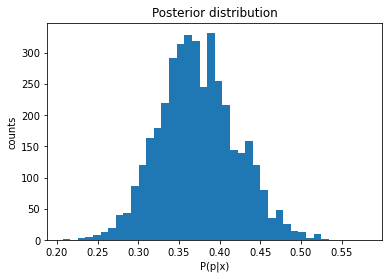

In [5]:
import matplotlib.pyplot as plt
plt.hist(results, bins=40)
plt.xlabel('P(p|x)')
plt.ylabel('counts')
plt.title('Posterior distribution')
plt.show()

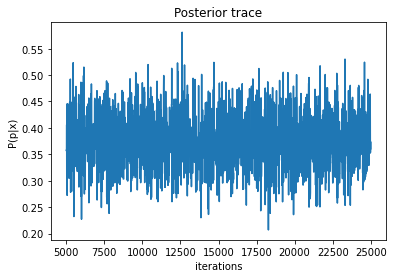

0.3733645356165912 0.048059721807395775


In [15]:
x_coordinate = [ 5.0 * i+5000 for i in range(len(results)) ]
plt.plot(x_coordinate,results)
plt.xlabel('iterations')
plt.ylabel('P(p|x)')
plt.title('Posterior trace')
plt.show()
print(np.mean(results),np.std(results))

#### We wait a while, and the factory produces 500 coins. We run the same 100 flip experiments and record the posterior’s most likely bias for each coin. From this we get a Gaussian distribution with mean =0.49 and sigma=0.05. We can use this as our new prior information to determine the bias of the next coin 

In [57]:

# Define parameters of the Factory Bias distribution
mean = 0.49
std = 0.05


# Create  prior function for this specific normal distribution
def prior2(p):
  return stats.norm.pdf(p, mean, std)

### Now that we have improved our model with more prior information, let’s produce the 501st coin and run the same experiment. In this experiment, we get 54 heads out of 100 tosses. We build our likelihood function off this data as we did before:

In [62]:
# Data for new coin
x = 34
n = 50

# Likelihood function - Binomial
def likelihood2(p):
  return stats.binom.pmf(x, n, p)

# Create function to compute acceptance ratio
# This function will accept the current and proposed values of p
def acceptance_ratio2(p, p_new):
    # Return R, using the functions we created before
    return min(1, ((likelihood2(p_new) / likelihood2(p)) * (prior2(p_new) / prior2(p))))

In [63]:
# Create empty list to store samples
results2 = []

# Initialzie a value of p
p = np.random.uniform(0, 1)

# Define model parameters
n_samples = 25000
burn_in = 5000
lag = 5

# Create the MCMC loop
for i in range(n_samples):
    # Propose a new value of p randomly from a uniform distribution between 0 and 1
    p_new = np.random.random_sample()
    # Compute acceptance probability
    R = acceptance_ratio2(p, p_new)
    # Draw random sample to compare R to
    u = np.random.random_sample()
    # If R is greater than u, accept the new value of p (set p = p_new)
    if u < R:
        p = p_new
    # Record values after burn in - how often determined by lag
    if i > burn_in and i%lag == 0:
        results2.append(p)

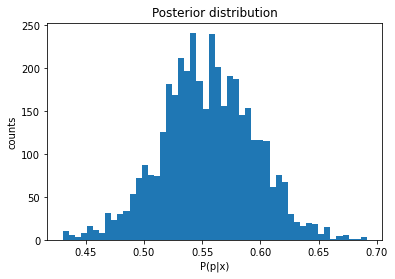

In [64]:
plt.hist(results2, bins=50)
plt.xlabel('P(p|x)')
plt.ylabel('counts')
plt.title('Posterior distribution')
plt.show()

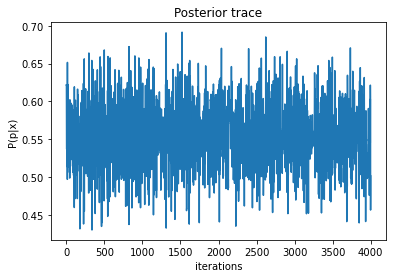

0.5548561748549856


In [65]:
x_coordinate = [ 1.0 * i for i in range(len(results2)) ]
plt.plot(x_coordinate,results2)
plt.xlabel('iterations')
plt.ylabel('P(p|x)')
plt.title('Posterior trace')
plt.show()
print(np.mean(results2))

### Additional information 
https://link.springer.com/article/10.3758/s13423-016-1015-8